In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data_path = r'C:\Projects\connecteddatahub\data'

In [16]:
stats_df = pd.read_csv(os.path.join(data_path, 'statistics', 'regression_university_board_statistics.csv'))
print(stats_df.columns)

Index(['Year', 'Institution', 'AffiliationId', 'female_president',
       'PrimarySample', 'total_members', 'total_ethnicity', 'board_turnover',
       'carnegie_id', 'state', 'control', 'StateSystem', 'region',
       'num_billionaires', 'student.women', 'faculty.women',
       'faculty.race_ethnicity.white', 'student.size',
       'cost.tuition.out_of_state', 'school.faculty_salary', 'RD_expenditure',
       'female_proportion', 'poc_proportion', 'billionaire_proportion',
       'eigenvector', 'betweenness', 'degree', 'strength', 'clustering',
       'betweenness_unweighted', 'clustering_unweighted', 'Rank'],
      dtype='object')


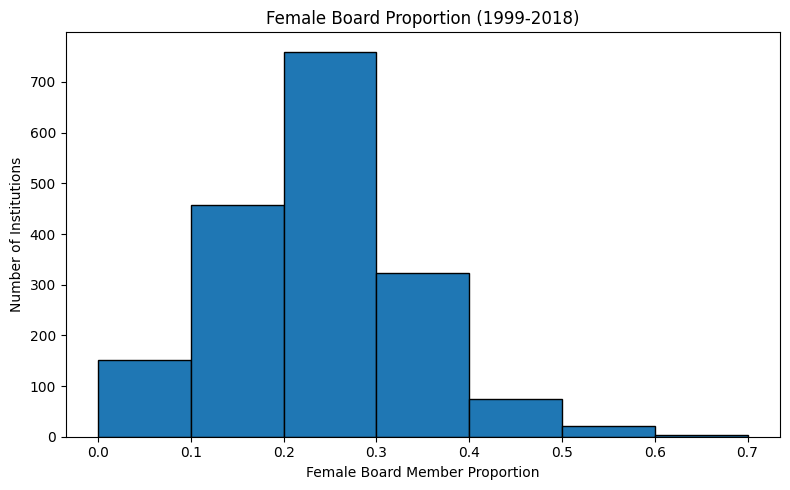

In [17]:

# Filter to year 2013
df2013 = stats_df

# Define bins from 0 to 1 in steps of 0.1
bins = np.arange(0, .8, 0.1)

# Plot histogram of female_proportion
plt.figure(figsize=(8,5))
plt.hist(df2013['female_proportion'], bins=bins, edgecolor='black')
plt.xlabel('Female Board Member Proportion')
plt.ylabel('Number of Institutions')
plt.title('Female Board Proportion (1999-2018)')
plt.xticks(bins)
plt.tight_layout()
plt.show()


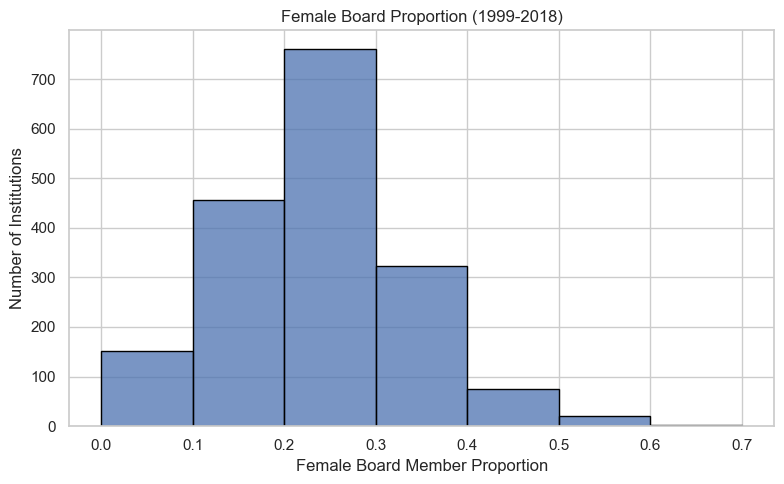

In [19]:
df2013 = stats_df

# Define bins from 0 to 0.8 in steps of 0.1
bins = np.arange(0, 0.8, 0.1)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df2013,
    x="female_proportion",
    bins=bins,
    kde=False,           # turn on kde=True if you want a density curve overlay
    edgecolor="black"    # keeps the bin edges clear
)
plt.xlabel("Female Board Member Proportion")
plt.ylabel("Number of Institutions")
plt.title("Female Board Proportion (1999-2018)")
plt.xticks(bins)
plt.tight_layout()
plt.show()


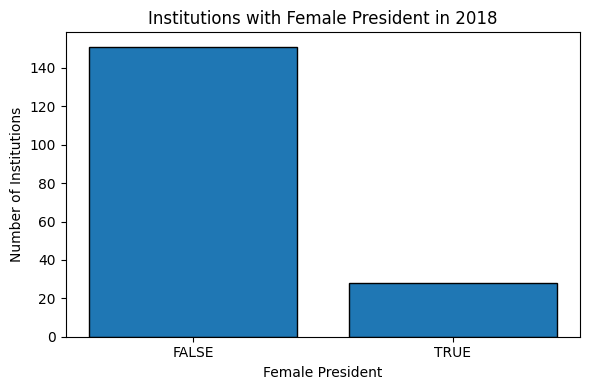

In [5]:
# Filter to year 2013
df2013 = stats_df[stats_df['Year'] == 2018]

# Count TRUE vs FALSE in female_president
counts = df2013['female_president'].value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(counts.index.astype(str), counts.values, edgecolor='black')
ax.set_xlabel('Female President')
ax.set_ylabel('Number of Institutions')
ax.set_title('Institutions with Female President in 2018')
ax.set_xticks([0, 1])
ax.set_xticklabels(['FALSE', 'TRUE'])
plt.tight_layout()
plt.show()


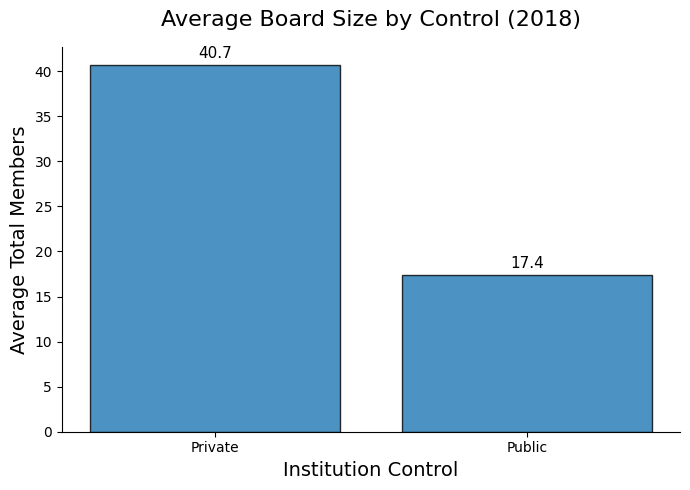

In [6]:

df2018 = stats_df[stats_df['Year'] == 2018]

# 2. Compute mean total_members by control
avg_members = df2018.groupby('control')['total_members'].mean()

# 3. Plot
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(
    avg_members.index, 
    avg_members.values, 
    edgecolor='black', 
    alpha=0.8
)

# 4. Styling
ax.set_xlabel('Institution Control', fontsize=14)          # removed fontweight
ax.set_ylabel('Average Total Members', fontsize=14)        # removed fontweight
ax.set_title('Average Board Size by Control (2018)', fontsize=16, pad=15)  # removed fontweight

# Remove grid entirely
ax.grid(False)

# Remove top/right spines for a cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# 5. Annotate each bar with its value
for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        h + 0.5, 
        f'{h:.1f}', 
        ha='center', 
        va='bottom', 
        fontsize=11
    )

plt.tight_layout()
plt.show()


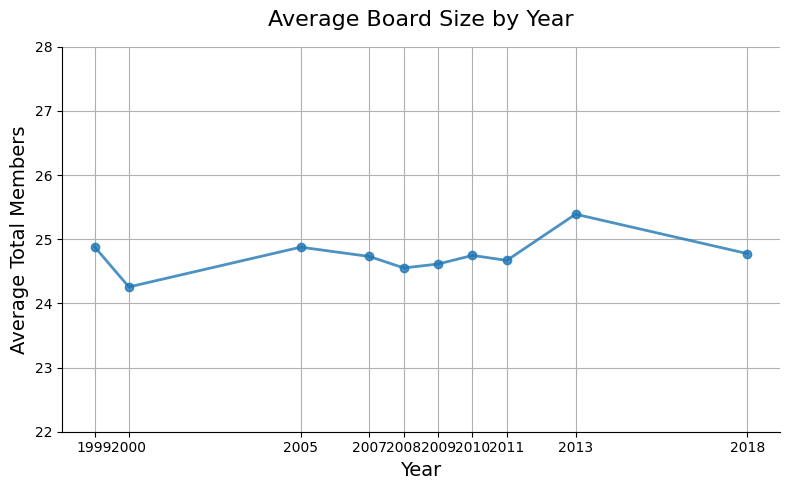

In [7]:
avg_by_year = stats_df.groupby('Year')['total_members'].mean().sort_index()

# 2. Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(
    avg_by_year.index,
    avg_by_year.values,
    marker='o',
    linewidth=2,
    alpha=0.8
)

# 3. Styling
ax.set_ylim(22, 28)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Average Total Members', fontsize=14)
ax.set_title('Average Board Size by Year', fontsize=16, pad=15)

# Remove grid and clean up spines
ax.grid(False)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

years = avg_by_year.index.astype(int)
ax.set_xticks(years)
ax.grid(True)

ax.set_xticklabels(years)

plt.tight_layout()
plt.show()

C:\Users\tykun\AppData\Local\Temp\ipykernel_24360\502876778.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_fp = stats_df.groupby('Rank_bin')['female_president'] \


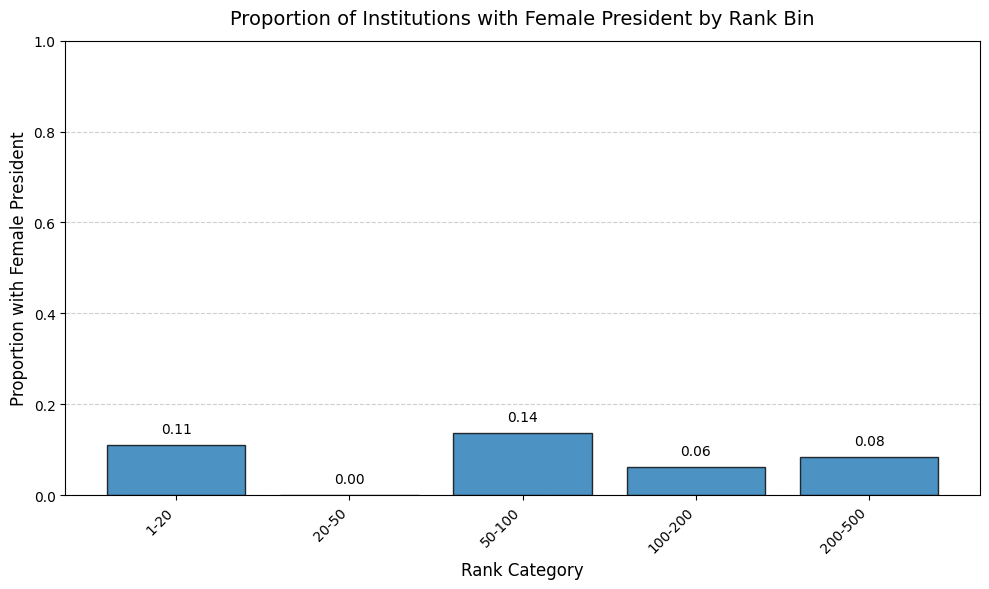

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Clean and bin Rank
stats_df['Rank_clean'] = (
    stats_df['Rank'].astype(str)
             .str.split('-', n=1).str[0]  # keep text before any dash
             .astype(int)
)

bins  = [1,  20,  50, 100, 200, 500]
labels = ['1-20','20-50','50-100','100-200','200-500']
stats_df['Rank_bin'] = pd.cut(
    stats_df['Rank_clean'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# 2. Compute TRUE‐proportion of female_president in each bin
#    (bools auto‐cast to 0/1 when you take the mean)
prop_fp = stats_df.groupby('Rank_bin')['female_president'] \
                  .mean() \
                  .reindex(labels)

# 3. Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(
    prop_fp.index,
    prop_fp.values,
    edgecolor='black',
    alpha=0.8
)

# 4. Styling
ax.set_xlabel('Rank Category', fontsize=12)
ax.set_ylabel('Proportion with Female President', fontsize=12)
ax.set_title('Proportion of Institutions with Female President by Rank Bin', fontsize=14, pad=12)
ax.set_ylim(0, 1)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.xticks(rotation=45, ha='right')

# 5. Annotate
for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + 0.02,
        f'{h:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()
